# Exploratory Data Analysis of Visits.csv

## 1) Loading the libraries and the dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import grafici
from dython.nominal import associations
import seaborn as sns
import plotly.graph_objects as go

In [2]:
# read the data
visits = pd.read_csv('./Cleaned_Data/visits.csv')

## 2) Prepare the data

In [3]:
# convert start_timestamp and end_timestamp to datetime
visits['start_timestamp'] = pd.to_datetime(visits['start_timestamp'])
visits['end_timestamp'] = pd.to_datetime(visits['end_timestamp'])

# print the oldest and the newest date
print('Oldest date:', visits['start_timestamp'].min())
print('Newest date:', visits['start_timestamp'].max())


Oldest date: 2020-06-25 01:00:00
Newest date: 2024-01-30 23:00:00


In [4]:
# check duplicates
print('Duplicates:', visits.duplicated().sum())

Duplicates: 0


In [5]:
# print the null values
print(visits.isnull().sum())

visit_id                    0
customer_id                 0
start_timestamp             0
end_timestamp               0
visit_type                  0
transaction_id         363807
visit_duration_time         0
dtype: int64


In [6]:
 # dtypes
visits.dtypes

visit_id                       object
customer_id                    object
start_timestamp        datetime64[ns]
end_timestamp          datetime64[ns]
visit_type                     object
transaction_id                 object
visit_duration_time            object
dtype: object

In [7]:
platform_colors = {
    'Dealership': 'blue',
    'Mobile App': 'orange',
    'Website': 'green'
}

### 2.1) Merge the datasets

Given the limited amount of info that the "users.csv" have, we can add them to the visits.csv dataset

In [8]:
# load users
users = pd.read_csv('Cleaned_Data/users.csv')

In [9]:
# merge the data on customer_id
visits = pd.merge(visits, users, on='customer_id', how='left')

In [10]:
visits.head()

,visit_id,customer_id,start_timestamp,end_timestamp,visit_type,transaction_id,visit_duration_time,user_first_name,user_last_name,gender,email,email_domain
0,7f94232d-9cca-4893-aebe-9a267a752f87,de5323eb-5e01-481f-b73a-bb78af953894,2023-04-18 10:51:24.477465,2023-04-18 11:46:26.893492,car configuration,NaN,0 days 00:55:02.416027,Michele,Beasley,Female,michele.beasley1988@gmail.com,gmail.com
1,dcb32330-15b0-4fd1-b376-9b9335fee7f9,15dcef30-b549-447b-8809-229c9de8526b,2021-03-03 17:54:25.117599,2021-03-03 18:07:25.117599,viewing,NaN,0 days 00:13:00,Taylor,Becker,Female,taylor@hotmail.com,hotmail.com
2,8b02d675-1365-45bc-af64-61ef9e79149c,3b656455-1690-47d9-b7ad-9e0aaa3bb229,2023-07-07 13:09:00.000000,2023-07-07 13:19:00.000000,purchasing,d1bfe5f5-edc1-4148-8eb0-8127dd3b52c1,0 days 00:10:00,Kathryn,Melton,Female,kathryn.melton@gmail.com,gmail.com
3,bdfc7048-adc5-4da7-a37a-4f9d90cf6436,c583c671-2f8a-47f3-9460-bd444b1811c8,2023-09-14 11:25:12.820271,2023-09-14 12:20:15.523626,car configuration,NaN,0 days 00:55:02.703355,Tamara,NaN,Female,mendez@gmail.com,gmail.com
4,2ad3a1e1-0b9c-417f-95f7-70607b0fe96e,da8268d8-4e81-4538-bf1d-836ac4d5b155,2020-12-04 19:15:41.833927,2020-12-04 19:27:41.833927,car configuration,NaN,0 days 00:12:00,Kimberly,Davis,Female,kimberly.davis@gmail.com,gmail.com


In [11]:
# checks the null values
print(visits.isnull().sum())

visit_id                    0
customer_id                 0
start_timestamp             0
end_timestamp               0
visit_type                  0
transaction_id         363807
visit_duration_time         0
user_first_name          3810
user_last_name           3802
gender                      0
email                    3787
email_domain             3787
dtype: int64


In [12]:
# checks the duplicates
print('Duplicates:', visits.duplicated().sum())

Duplicates: 0


In [13]:
# checks the dtypes
visits.dtypes

visit_id                       object
customer_id                    object
start_timestamp        datetime64[ns]
end_timestamp          datetime64[ns]
visit_type                     object
transaction_id                 object
visit_duration_time            object
user_first_name                object
user_last_name                 object
gender                         object
email                          object
email_domain                   object
dtype: object

In [14]:
# change the dtype of visit_duration_time in seconds
visits['visit_duration_time'] = pd.to_timedelta(visits['visit_duration_time']).dt.total_seconds()

In [15]:
# merge the data on purchase_id
sales = pd.read_csv('Modified_Data/sales.csv')

# keep only the columns needed
sales = sales[['transaction_id', 'platform', 'purchase_date',
       'purchase_price', 'user_review', 'car_model', 'fuel_type',
       'release_date', 'price', 'discount', 'car_age_days']]


visits = pd.merge(visits, sales, on='transaction_id', how='left')

visit_id                       object
customer_id                    object
start_timestamp        datetime64[ns]
end_timestamp          datetime64[ns]
visit_type                     object
transaction_id                 object
visit_duration_time            object
user_first_name                object
user_last_name                 object
gender                         object
email                          object

In [16]:
sales.columns

Index(['transaction_id', 'platform', 'purchase_date', 'purchase_price',
       'user_review', 'car_model', 'fuel_type', 'release_date', 'price',
       'discount', 'car_age_days'],
      dtype='object')

In [17]:
visits.head()

,visit_id,customer_id,start_timestamp,end_timestamp,visit_type,transaction_id,visit_duration_time,user_first_name,user_last_name,gender,...,platform,purchase_date,purchase_price,user_review,car_model,fuel_type,release_date,price,discount,car_age_days
0,7f94232d-9cca-4893-aebe-9a267a752f87,de5323eb-5e01-481f-b73a-bb78af953894,2023-04-18 10:51:24.477465,2023-04-18 11:46:26.893492,car configuration,NaN,3302.416027,Michele,Beasley,Female,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,dcb32330-15b0-4fd1-b376-9b9335fee7f9,15dcef30-b549-447b-8809-229c9de8526b,2021-03-03 17:54:25.117599,2021-03-03 18:07:25.117599,viewing,NaN,780.000000,Taylor,Becker,Female,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,8b02d675-1365-45bc-af64-61ef9e79149c,3b656455-1690-47d9-b7ad-9e0aaa3bb229,2023-07-07 13:09:00.000000,2023-07-07 13:19:00.000000,purchasing,d1bfe5f5-edc1-4148-8eb0-8127dd3b52c1,600.000000,Kathryn,Melton,Female,...,Dealership,2023-07-07,30000.0,3.0,1 Series,Diesel,2010-10-01,30000.0,0.0,4662.0
3,bdfc7048-adc5-4da7-a37a-4f9d90cf6436,c583c671-2f8a-47f3-9460-bd444b1811c8,2023-09-14 11:25:12.820271,2023-09-14 12:20:15.523626,car configuration,NaN,3302.703355,Tamara,NaN,Female,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2ad3a1e1-0b9c-417f-95f7-70607b0fe96e,da8268d8-4e81-4538-bf1d-836ac4d5b155,2020-12-04 19:15:41.833927,2020-12-04 19:27:41.833927,car configuration,NaN,720.000000,Kimberly,Davis,Female,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 2.2) Feature engineering

In [18]:
# create a new column with the month and the year "2020-08" (useful for the analysis)
visits['month_year'] = visits['start_timestamp'].dt.to_period('M')

In [19]:
# add a boolean based on the presence of a purchase "transaction_id"
visits['purchased'] = visits['transaction_id'].notnull()

In [20]:
# calculate the average visit time back to the original dataframe
visits['average_visit_time'] = visits['customer_id'].map(visits.groupby('customer_id')['visit_duration_time'].mean())

In [21]:
# add for every customer the visit number based on the start_timestamp
visits['visit_number'] = visits.groupby('customer_id')['start_timestamp'].rank(method='first', ascending=True)

In [22]:
# crate a new column that is true if the customer has leaved a review
visits['reviewed'] = visits['user_review'].notnull()

In [23]:
# create a column that contains the string visit_type to visit_type if the same user has visited more than once and the visit type is different, do this based on the start_timestamp
# sort the dataframe by customer_id and start_timestamp
visits = visits.sort_values(by=['customer_id', 'start_timestamp'])

# create the switch_type column
visits['switch_type'] = visits.groupby('customer_id')['visit_type'].shift() + ' to ' + visits['visit_type']

In [24]:
# print the count of the switch_type
visits['switch_type'].value_counts()

switch_type
viewing to viewing                        76820
viewing to purchasing                     46875
testing to testing                        40191
car configuration to viewing              23576
viewing to car configuration              22308
testing to viewing                        17402
viewing to testing                        16896
purchasing to viewing                     14463
testing to purchasing                     13482
car configuration to car configuration     9935
car configuration to purchasing            9896
purchasing to car configuration            7640
testing to car configuration               1566
car configuration to testing               1361
Name: count, dtype: int64

In [25]:
# plot a Sankey diagram of visit type transitions

visits_sankey = visits.copy()

visits_sankey = visits_sankey.sort_values(by=['customer_id', 'start_timestamp'])
visits_sankey['next_visit_type'] = visits_sankey.groupby('customer_id')['visit_type'].shift(-1)

visit_type_indices = {
    'viewing': 0,
    'testing': 1,
    'car configuration': 2,
    'purchasing': 3
}

transition_counts = visits_sankey.groupby(['visit_type', 'next_visit_type']).size().reset_index(name='count')
transition_counts['source'] = transition_counts['visit_type'].map(visit_type_indices)
transition_counts['target'] = transition_counts['next_visit_type'].map(visit_type_indices)

fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=["viewing", "testing", "car configuration", "purchasing"],
        color=["blue", "green", "purple", "orange"]
    ),
    link=dict(
        source=transition_counts['source'],
        target=transition_counts['target'],
        value=transition_counts['count']
    )
)])


fig.update_layout(title_text="Sankey Diagram of Visit Type Transitions", font_size=10)
fig.show()

del visits_sankey


In [26]:
# show the customers that have the switch_type "purchasing to viewing"
visits[visits['switch_type'] == 'purchasing to viewing'].head(5)

,visit_id,customer_id,start_timestamp,end_timestamp,visit_type,transaction_id,visit_duration_time,user_first_name,user_last_name,gender,...,release_date,price,discount,car_age_days,month_year,purchased,average_visit_time,visit_number,reviewed,switch_type
53896,e0cf90eb-acd2-448c-8dfe-649bd29da418,00025afa-8bb4-41da-808b-4d31a09d8768,2023-11-03 08:44:59.877969,2023-11-03 09:40:08.938905,viewing,NaN,3309.060936,Anita,Maddox,Female,...,NaN,NaN,NaN,NaN,2023-11,False,2807.265234,4.0,False,purchasing to viewing
170567,7cb506f0-0078-4893-9cf9-198b4edf3b44,00039e36-b5c3-4019-82ca-b6891f1b3198,2022-08-10 09:28:15.178155,2022-08-10 10:23:16.207613,viewing,NaN,3301.029458,Jennifer,Martinez,Female,...,NaN,NaN,NaN,NaN,2022-08,False,2629.341394,4.0,False,purchasing to viewing
281165,0e409a10-9839-44c3-a53c-b9e5d1504650,000c1d19-cce3-42f7-b62e-154d5e1c0c55,2023-11-08 10:16:47.705479,2023-11-08 11:11:59.961564,viewing,NaN,3312.256085,Jennifer,Chavez,Female,...,NaN,NaN,NaN,NaN,2023-11,False,1504.085362,3.0,False,purchasing to viewing
85008,0955b658-c88e-42cd-872f-9b1206717c7e,00164252-bfae-4f44-b6ae-76c211993a75,2023-11-01 11:19:43.148627,2023-11-01 12:14:44.399970,viewing,NaN,3301.251343,Lori,Williams,Female,...,NaN,NaN,NaN,NaN,2023-11,False,2740.417114,3.0,False,purchasing to viewing
8330,7b48edf3-4720-4269-a08d-cfaa5f878df8,001a6022-f75c-4e5b-9496-dcfa03ebf611,2023-12-10 09:18:16.242659,2023-12-10 10:13:24.542969,viewing,NaN,3308.300310,Kevin,Burke,Male,...,NaN,NaN,NaN,NaN,2023-12,False,2074.150155,2.0,False,purchasing to viewing


Ok, that makes sense.

In [27]:
# if the switch_type is "viewing to something" create a column that contains a bool value "Engaged" (except viewing to viewing)
visits['engaged'] = visits['switch_type'].fillna('').apply(lambda x: x.startswith('viewing to') and x != 'viewing to viewing')

In [28]:
# create a column for the customer loyalty (time between the first and the last visit) in days as an integer
visits['loyalty'] = visits.groupby('customer_id')['start_timestamp'].transform(lambda x: (x.max() - x.min()).days)

In [29]:
# impute the platform, group by the user_id if the start_timestamp is in the same week
visits['platform'] = visits['platform'].fillna(visits.groupby('customer_id')['platform'].transform('first'))

# with the same logic impute the purchase_date, purchase_price, user_review, car_model, fuel_type, release_date, price, discount, car_age_days
visits['purchase_date'] = visits['purchase_date'].fillna(visits.groupby('customer_id')['purchase_date'].transform('first'))
visits['purchase_price'] = visits['purchase_price'].fillna(visits.groupby('customer_id')['purchase_price'].transform('first'))
visits['user_review'] = visits['user_review'].fillna(visits.groupby('customer_id')['user_review'].transform('first'))
visits['car_model'] = visits['car_model'].fillna(visits.groupby('customer_id')['car_model'].transform('first'))
visits['fuel_type'] = visits['fuel_type'].fillna(visits.groupby('customer_id')['fuel_type'].transform('first'))
visits['price'] = visits['price'].fillna(visits.groupby('customer_id')['price'].transform('first'))
visits['discount'] = visits['discount'].fillna(visits.groupby('customer_id')['discount'].transform('first'))
visits['car_age_days'] = visits['car_age_days'].fillna(visits.groupby('customer_id')['car_age_days'].transform('first'))
visits['user_review'] = visits['user_review'].fillna(visits.groupby('customer_id')['user_review'].transform('first'))

We can make this assumption because only two users bought a car twice. Therefore, we assume that users who made a purchase visited the same platform before buying and for the same car.

In [30]:
visits.isna().sum()

visit_id                    0
customer_id                 0
start_timestamp             0
end_timestamp               0
visit_type                  0
transaction_id         363807
visit_duration_time         0
user_first_name          3810
user_last_name           3802
gender                      0
email                    3787
email_domain             3787
platform               125546
purchase_date          125546
purchase_price         125546
user_review            398264
car_model              125546
fuel_type              125546
release_date           363807
price                  125546
discount               125546
car_age_days           125546
month_year                  0
purchased                   0
average_visit_time          0
visit_number                0
reviewed                    0
switch_type            136176
engaged                     0
loyalty                     0
dtype: int64

### 2.2) Associations

In [31]:
visits_dython = visits.copy()

# create a column for only the "Dealership" category in the platform column
visits_dython['Dealership'] = visits_dython['platform'] == 'Dealership'

# print all the column that have id in the name
id_columns = [col for col in visits_dython.columns if '_id' in col]
print("We are dropping the following columns:", id_columns)
visits_dython.drop(columns=id_columns, inplace=True)

We are dropping the following columns: ['visit_id', 'customer_id', 'transaction_id']


In [32]:
visits_dython["month_year"] = visits_dython["month_year"].astype(str)

c:\Users\gabri\AppData\Local\Programs\Python\Python311\Lib\site-packages\dython\nominal.py:632: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.



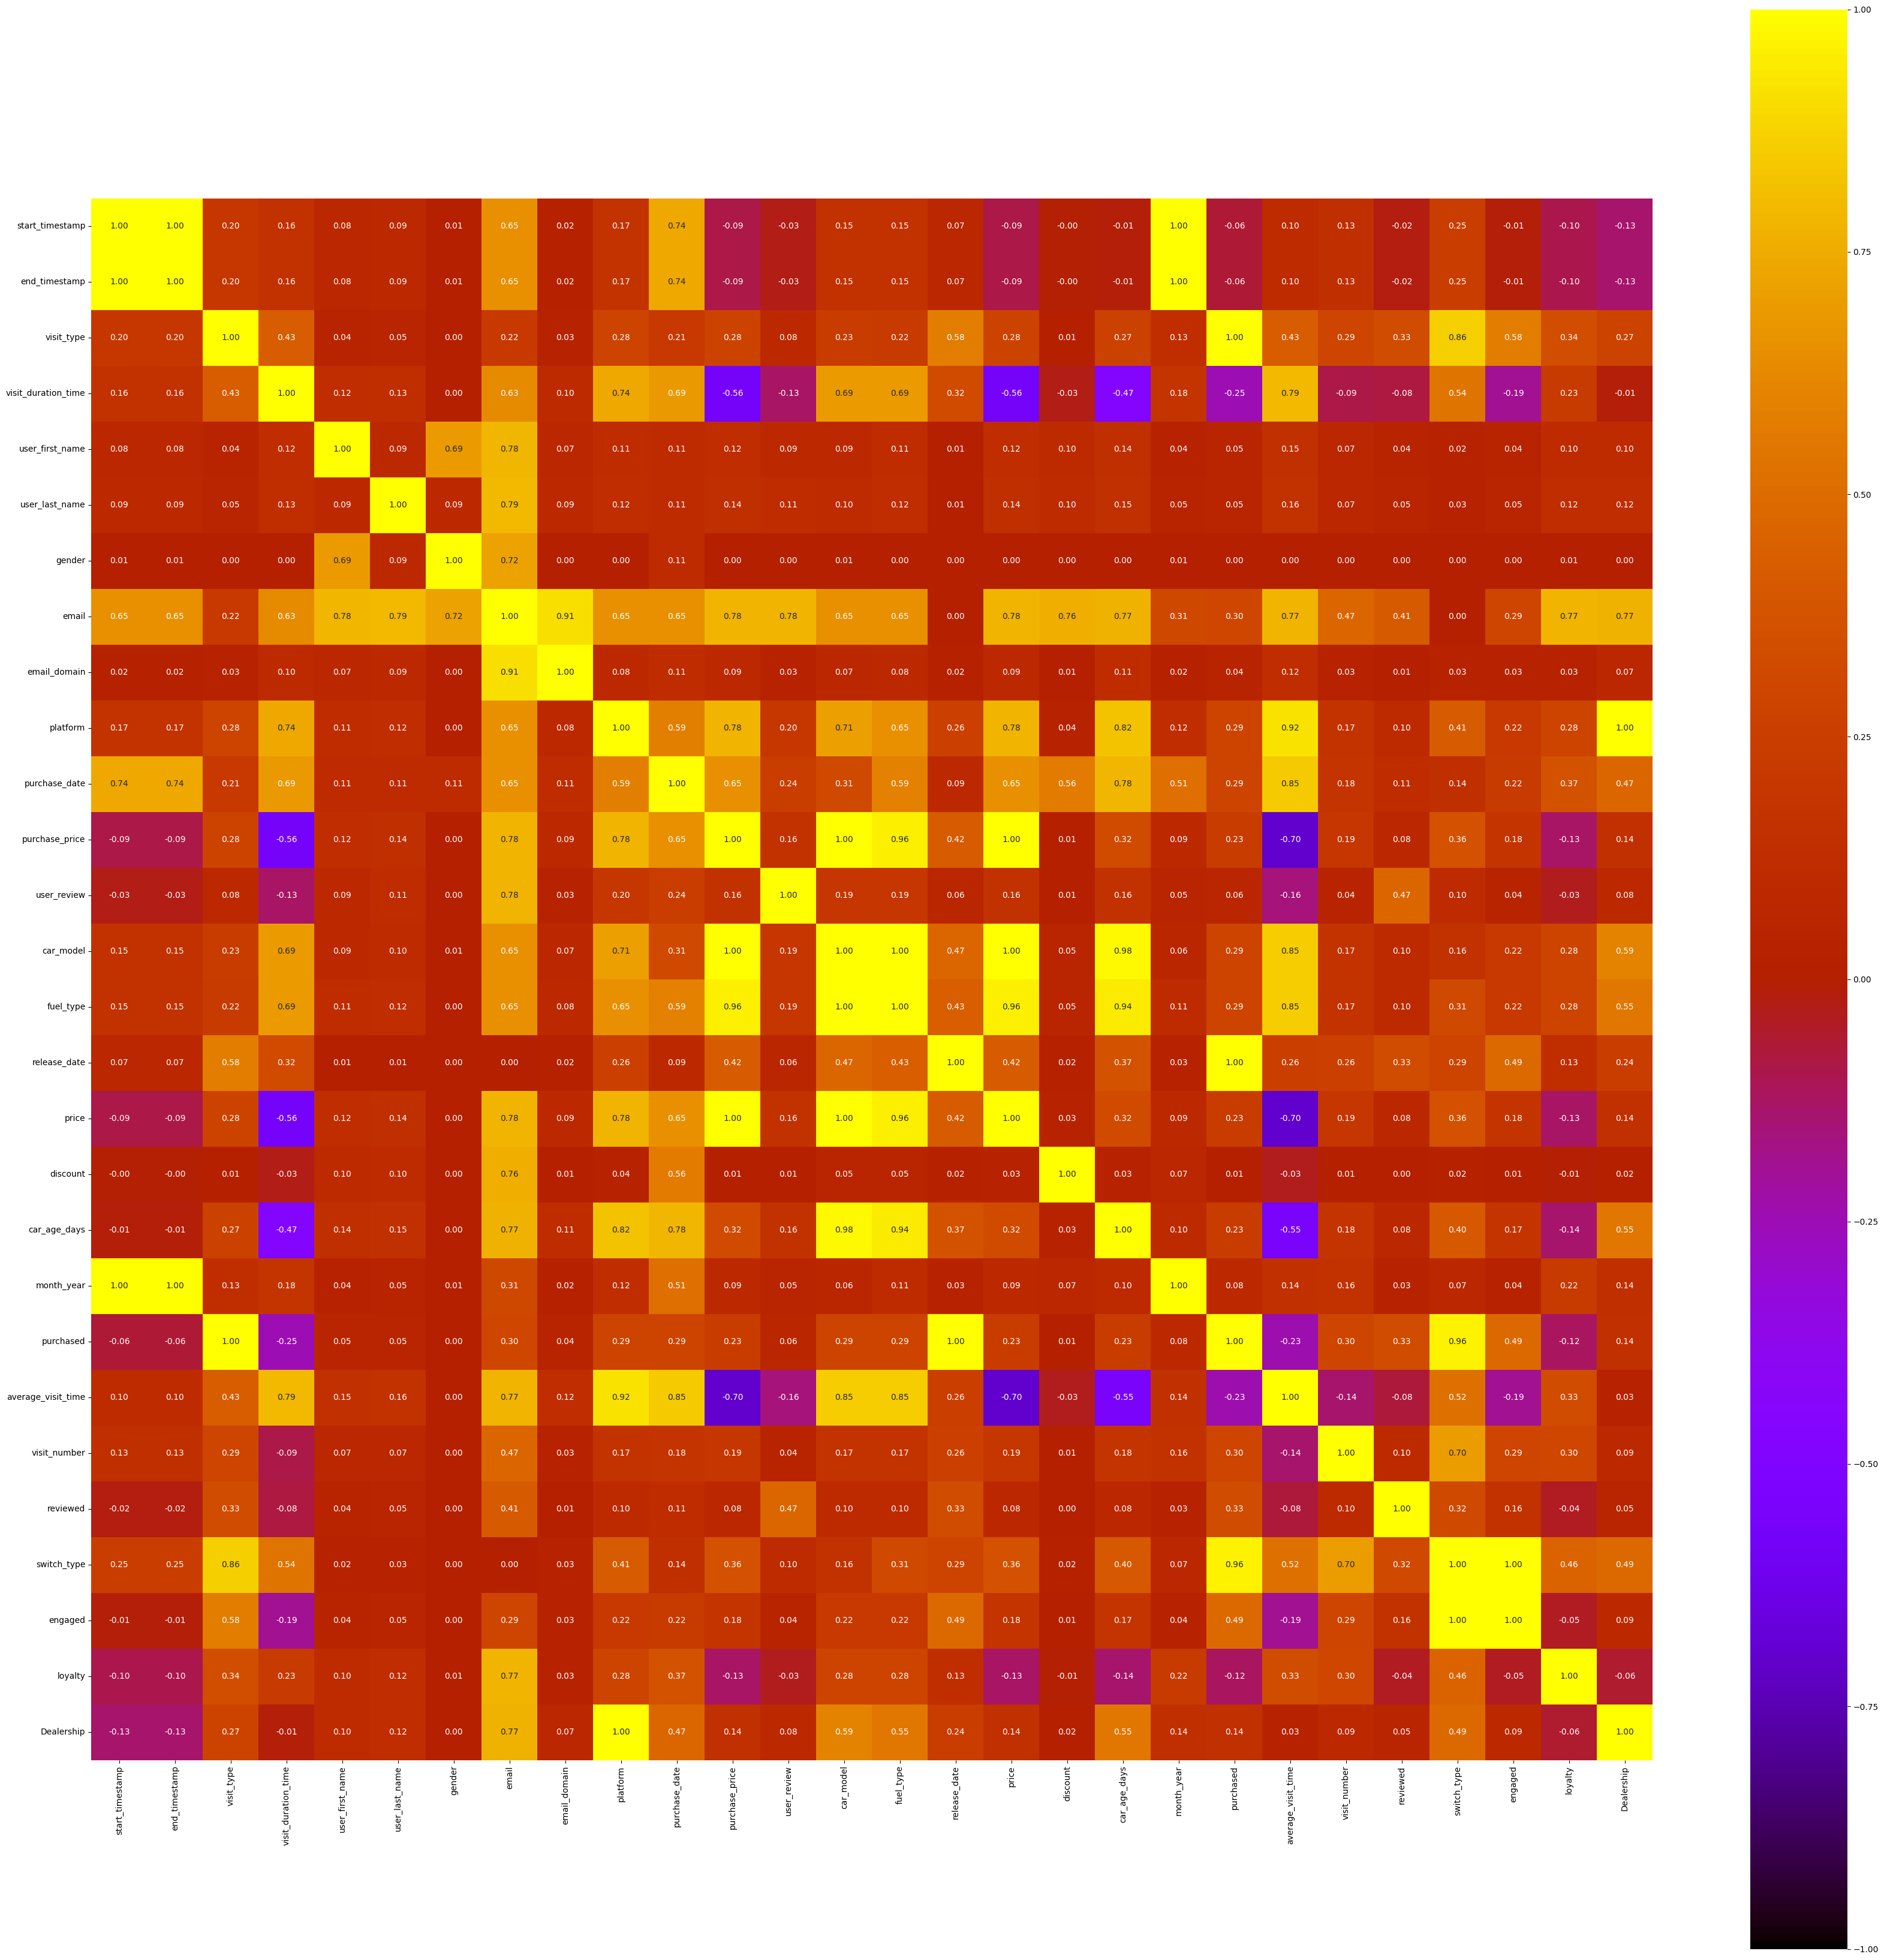

In [33]:
associations_visits = associations(visits_dython, multiprocessing=True, cmap='gnuplot', num_num_assoc='spearman')

Seems that the Dealership has a strong correlation wit a lot of different features, the ones that we were expecting are: the purchase bool, the platform type and the user review

The associations that we weren't expecting are: the price and the visit duration time

It's interesting to see how the purchase and visit type have the same association


## 3) Analyse all columns one by one

### id columns

In [34]:
# check any strange values in the visit_id column
visits[~visits['visit_id'].fillna('').str.contains(r'[a-z0-9]{8}-[a-z0-9]{4}-[a-z0-9]{4}-[a-z0-9]{4}-[a-z0-9]{12}')]["visit_id"].value_counts()

Series([], Name: count, dtype: int64)

In [35]:
# check any strange values in the customer_id column
visits[~visits['customer_id'].fillna('').str.contains(r'[a-z0-9]{8}-[a-z0-9]{4}-[a-z0-9]{4}-[a-z0-9]{4}-[a-z0-9]{12}')]["customer_id"].value_counts()

Series([], Name: count, dtype: int64)

In [36]:
# check any strange values in the customer_id column
visits[~visits['transaction_id'].fillna('').str.contains(r'[a-z0-9]{8}-[a-z0-9]{4}-[a-z0-9]{4}-[a-z0-9]{4}-[a-z0-9]{12}')]["transaction_id"].value_counts()

Series([], Name: count, dtype: int64)

In [37]:
# check duplicates on visit_id
print('Duplicates:', visits['visit_id'].duplicated().sum())

Duplicates: 0


In [38]:
# check duplicates on transaction_id where is not null
print('Duplicates:', visits[visits['transaction_id'].notnull()]['transaction_id'].duplicated().sum())

Duplicates: 0


In [39]:
# check duplicates on customer_id (we expect duplicates)
print('Duplicates:', visits['customer_id'].duplicated().sum())

Duplicates: 302411


In [40]:
# print the top 5 customers with the most visits
print(visits['customer_id'].value_counts().head())

customer_id
db1482ff-1a20-43c0-94c5-bcacba70d5ea    17
baf07990-e4c0-4b45-8d74-1dd054073fc2    15
40a8e90c-7b08-4958-9135-0d76684c922c    15
bd57c252-55a7-47c4-915f-572db31439cb    14
88617f81-5147-4b1a-a556-6731e76e1d1c    13
Name: count, dtype: int64


### Start timestamp column

In [41]:
# check the first and the last start timestamp
print('Oldest date:', visits['start_timestamp'].min())
print('Newest date:', visits['start_timestamp'].max())

Oldest date: 2020-06-25 01:00:00
Newest date: 2024-01-30 23:00:00


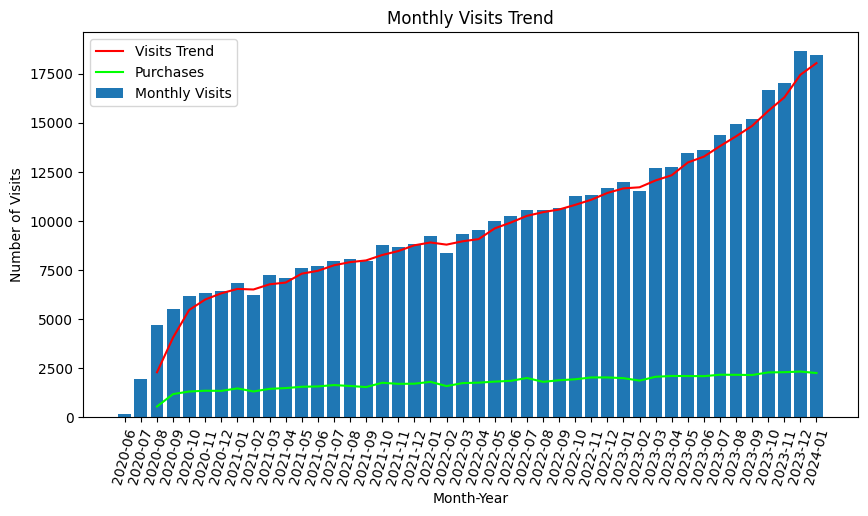

In [42]:
# create a figure and axis
fig, ax = plt.subplots(figsize=(10, 5))

# plot the bar chart
monthly_visits = visits['start_timestamp'].dt.to_period('M').value_counts().sort_index()
ax.bar(monthly_visits.index.astype(str), monthly_visits.values, label='Monthly Visits')

# plot the line chart
ax.plot(monthly_visits.index.astype(str), monthly_visits.rolling(window=3).mean().values, color='red', label='Visits Trend')

# adding the purchase line
monthly_purchases = visits[visits['purchased']]['start_timestamp'].dt.to_period('M').value_counts().sort_index()
ax.plot(monthly_purchases.index.astype(str), monthly_purchases.values, color='lime', label='Purchases')

# set the labels and title
ax.set_xlabel('Month-Year')
ax.set_ylabel('Number of Visits')
ax.set_title('Monthly Visits Trend')

# rotate x-axis labels for better readability
plt.xticks(rotation=75)

# add a legend
ax.legend()

# show the plot
plt.show()

Really interesting, the trend is exatly what we want

The number of purchases needs more investigation

##### Number of Customers per Month by Platform

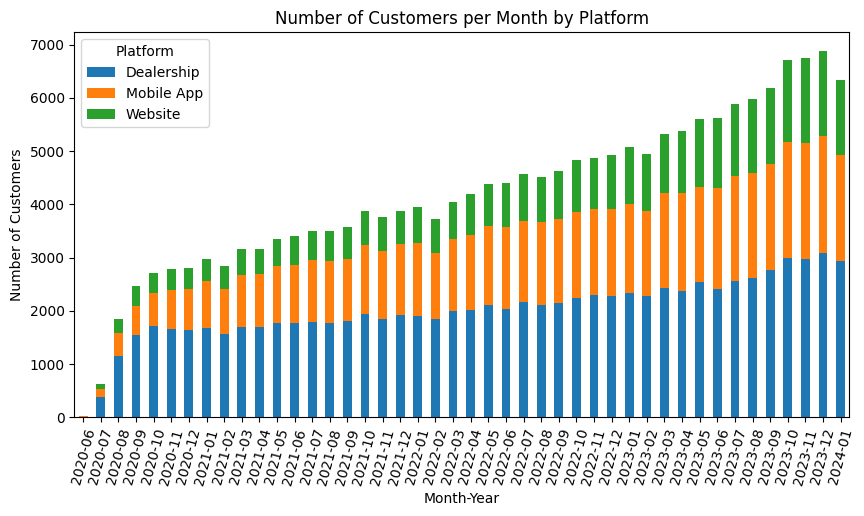

In [43]:
# Group by month_year and platform, and count the number of unique customers
monthly_customers = visits.groupby(['month_year', 'platform'])['customer_id'].nunique().unstack()

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 5))

# Plot the number of customers per month by platform
monthly_customers.plot(kind='bar', stacked=True, ax=ax)

# Set the labels and title
ax.set_xlabel('Month-Year')
ax.set_ylabel('Number of Customers')
ax.set_title('Number of Customers per Month by Platform')

# Rotate x-axis labels for better readability
plt.xticks(rotation=75)

# Add a legend
ax.legend(title='Platform')

# Show the plot
plt.show()

### End timestamp column

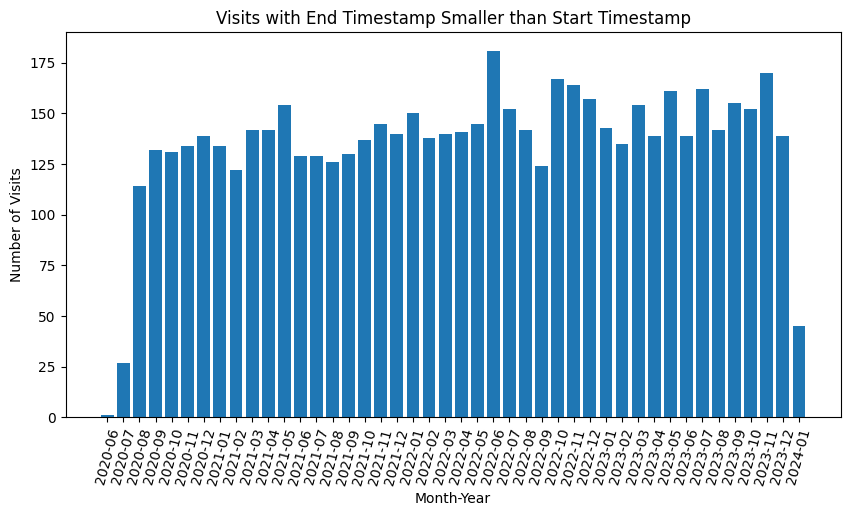

In [44]:
# plot when the end_timestamp is smaller than the start_timestamp
fig, ax = plt.subplots(figsize=(10, 5))

# plot the histogram
ax.bar(x =      visits[visits['end_timestamp'] < visits['start_timestamp']].groupby(visits['start_timestamp'].dt.to_period('M')).size().index.astype(str), 
       height = visits[visits['end_timestamp'] < visits['start_timestamp']].groupby(visits['start_timestamp'].dt.to_period('M')).size().values)

# set the labels and title
ax.set_xlabel('Month-Year')
ax.set_ylabel('Number of Visits')
ax.set_title('Visits with End Timestamp Smaller than Start Timestamp')

# rotate x-axis labels for better readability
plt.xticks(rotation=75)

# show the plot
plt.show()

It seems fine, from now on we're going to base our analysis on the start datetime

### Visit duration seconds

<Axes: title={'center': 'visit_duration_time'}, xlabel='platform'>

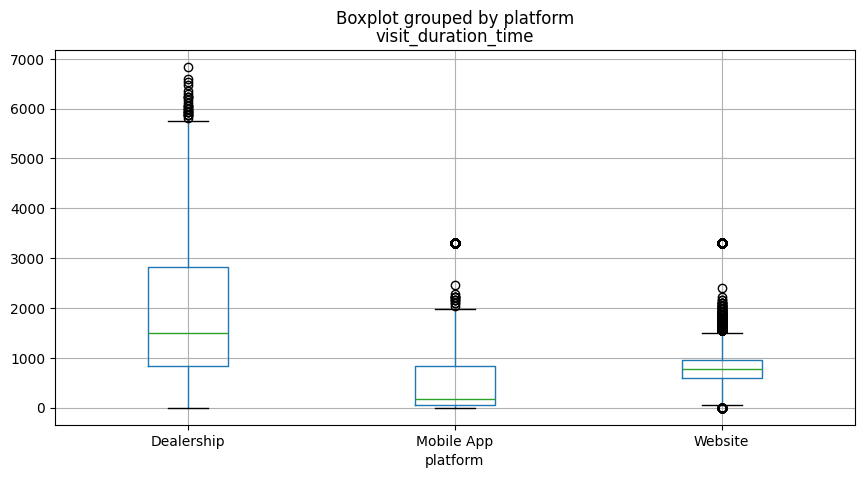

In [45]:
# box plot of the visit_duration_time by platform
fig, ax = plt.subplots(figsize=(10, 5))

# plot the boxplot
visits.boxplot(column='visit_duration_time', by='platform', ax=ax)

#### Average Visit Time vs Purchase Likelihood

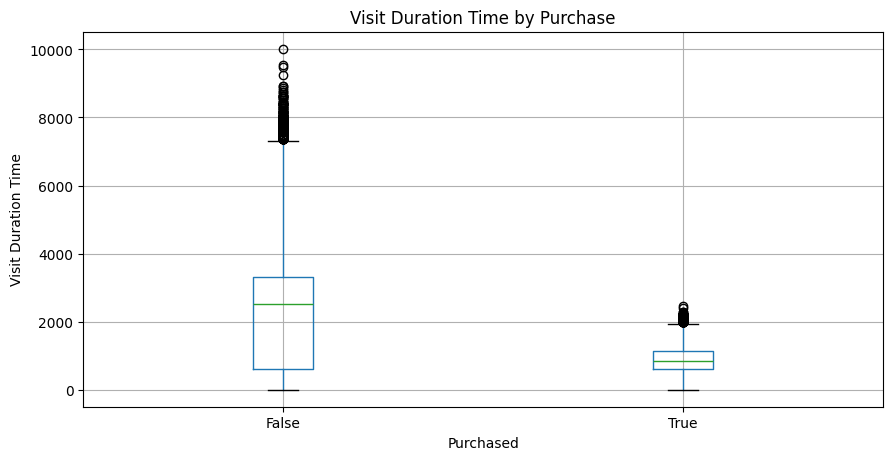

In [46]:
# box plot of the visit_duration_time by purchase
fig, ax = plt.subplots(figsize=(10, 5))

# plot the boxplot
visits.boxplot(column='visit_duration_time', by='purchased', ax=ax)
plt.title('Visit Duration Time by Purchase')
plt.suptitle('')
plt.xlabel('Purchased')
plt.ylabel('Visit Duration Time')
plt.show()

It appears that users who spend an excessive amount of time on the platform tend to lose interest in purchasing a car. <br>This insight is interesting and suggests potential areas for improvement. <br>Implementing an AI assistant for real-time user questions or sending follow-up emails with special discounts to users who did not complete a purchase could improve engagement and conversion rates.

#### Monthly Average Visit Duration

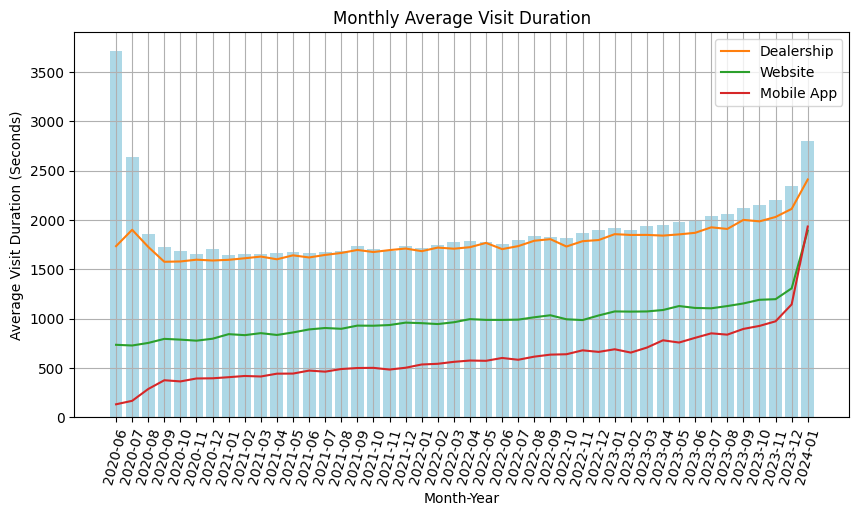

In [47]:
# plot the visit_duration_time distribution by month and year
fig, ax = plt.subplots(figsize=(10, 5))

# plot the histogram
monthly_duration = visits.groupby(visits['start_timestamp'].dt.to_period('M'))['visit_duration_time'].mean()
ax.bar(monthly_duration.index.astype(str), monthly_duration.values, color='lightblue', alpha=1)

# plot a line for every platform
for platform in visits['platform'].unique():
    monthly_duration = visits[visits['platform'] == platform].groupby(visits['start_timestamp'].dt.to_period('M'))['visit_duration_time'].mean()
    ax.plot(monthly_duration.index.astype(str), monthly_duration.values, label=platform)

# set the labels and title
ax.set_xlabel('Month-Year')
ax.set_ylabel('Average Visit Duration (Seconds)')
ax.set_title('Monthly Average Visit Duration')

# rotate x-axis labels for better readability
plt.xticks(rotation=75)

# add a legend
ax.legend()

# show a grid
plt.grid(True)

# show the plot
plt.show()

It can be observed that in June 2020, the average visit duration was unusually high. <br>From November 2020 (the historical minimum), the trend reversed, and January 2024 is the month with the highest average duration. <br>The trend suggests that something happened recently that significantly increased the average visit duration.

In [48]:
# check the null values
visits.isnull().sum()

visit_id                    0
customer_id                 0
start_timestamp             0
end_timestamp               0
visit_type                  0
transaction_id         363807
visit_duration_time         0
user_first_name          3810
user_last_name           3802
gender                      0
email                    3787
email_domain             3787
platform               125546
purchase_date          125546
purchase_price         125546
user_review            398264
car_model              125546
fuel_type              125546
release_date           363807
price                  125546
discount               125546
car_age_days           125546
month_year                  0
purchased                   0
average_visit_time          0
visit_number                0
reviewed                    0
switch_type            136176
engaged                     0
loyalty                     0
dtype: int64

In [49]:
# number of nans
print(visits.isnull().sum())

visit_id                    0
customer_id                 0
start_timestamp             0
end_timestamp               0
visit_type                  0
transaction_id         363807
visit_duration_time         0
user_first_name          3810
user_last_name           3802
gender                      0
email                    3787
email_domain             3787
platform               125546
purchase_date          125546
purchase_price         125546
user_review            398264
car_model              125546
fuel_type              125546
release_date           363807
price                  125546
discount               125546
car_age_days           125546
month_year                  0
purchased                   0
average_visit_time          0
visit_number                0
reviewed                    0
switch_type            136176
engaged                     0
loyalty                     0
dtype: int64


### Visit type column

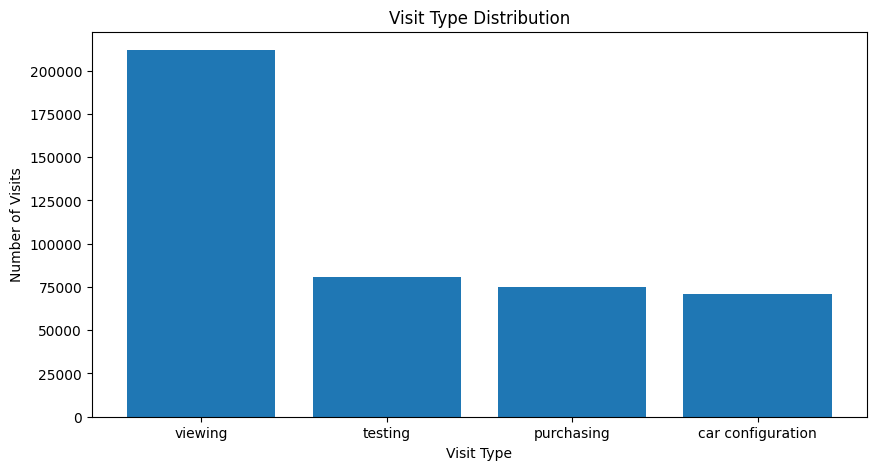

In [50]:
# plot the distribution of the visit_type
fig, ax = plt.subplots(figsize=(10, 5))

# plot the histogram
visit_type = visits['visit_type'].value_counts()
ax.bar(visit_type.index, visit_type.values)

# set the labels and title
ax.set_xlabel('Visit Type')
ax.set_ylabel('Number of Visits')
ax.set_title('Visit Type Distribution')

# show the plot
plt.show()

We can see that there's a lot of users that visit the website

Strangely the number of purchasing is bigger than the car configuration one, that's really strange

In [51]:
# filter visits where visit_number is not 1 and visit_type changed from 'visit' to anything else
jumped_visits = visits[(visits['visit_number'] != 1) & (visits['visit_type'] != 'visit')]
jumped_visits_count = jumped_visits.groupby('customer_id').size()

print(f"Number of users who jumped from visit to anything else: {jumped_visits_count.shape[0]}")
percentage = jumped_visits_count.shape[0] / visits['customer_id'].nunique() * 100
print(f"Percentage of users who jumped from visit to anything else: {percentage:.2f}%")

Number of users who jumped from visit to anything else: 100694
Percentage of users who jumped from visit to anything else: 73.94%


#### Monthly Visits by Visit Type

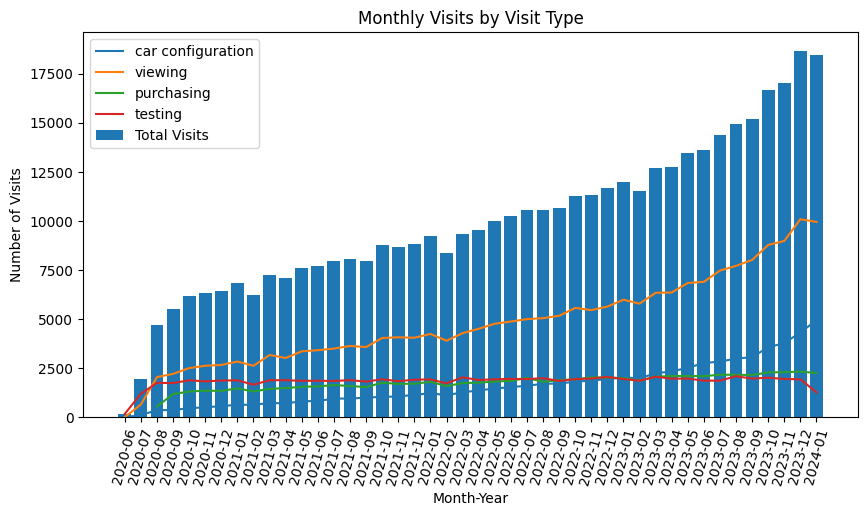

In [52]:
# plot the number of visit_type by month and year
fig, ax = plt.subplots(figsize=(10, 5))

# plot the histogram of total visits
monthly_visits = visits['start_timestamp'].dt.to_period('M').value_counts().sort_index()
ax.bar(monthly_visits.index.astype(str), monthly_visits.values, label='Total Visits')

# plot a line for every visit_type
for visit_type in visits['visit_type'].unique():
    monthly_visits = visits[visits['visit_type'] == visit_type]['start_timestamp'].dt.to_period('M').value_counts().sort_index()
    ax.plot(monthly_visits.index.astype(str), monthly_visits.values, label=visit_type)

# set the labels and title
ax.set_xlabel('Month-Year')
ax.set_ylabel('Number of Visits')
ax.set_title('Monthly Visits by Visit Type')

# rotate x-axis labels for better readability
plt.xticks(rotation=75)

# add a legend
ax.legend()

# show the plot
plt.show()

The number of customers testing cars appears to be decreasing, while the number of customers configuring cars is on a constant rise. This trend is particularly interesting because the testing option is only available at the Dealership. It demonstrates a shift in customer behavior.

#### Monthly Visits by Visit Type (in details)

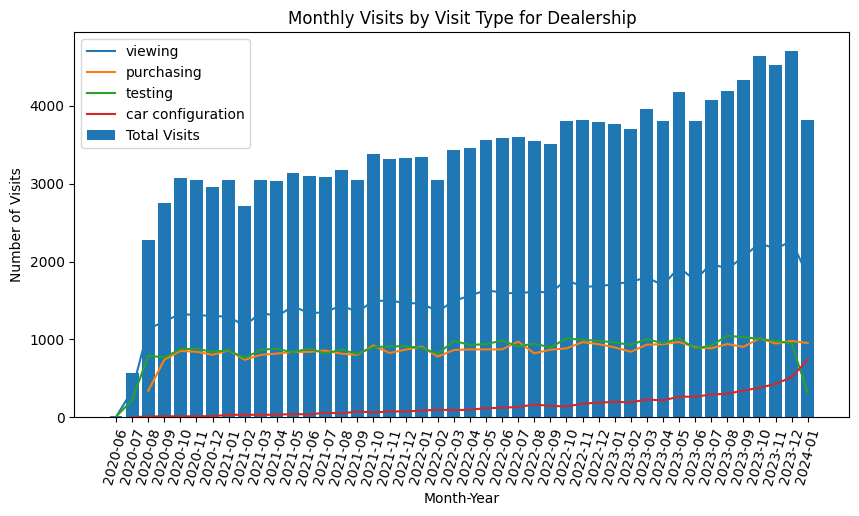

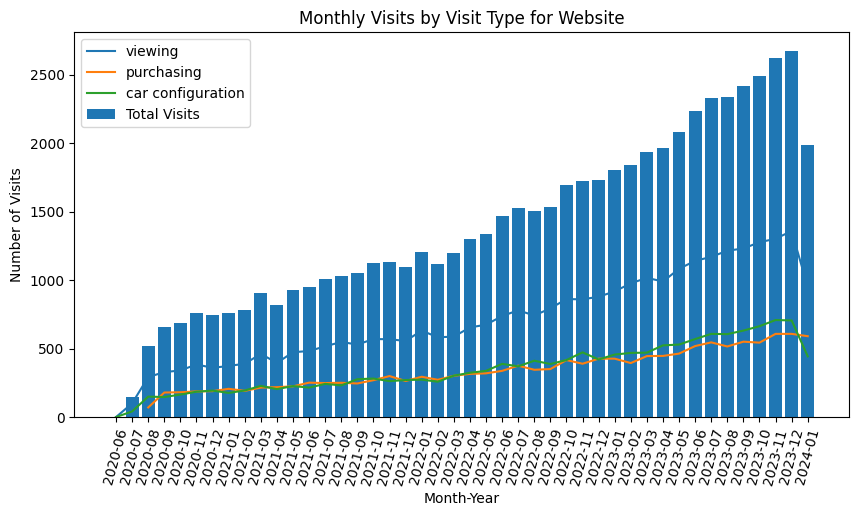

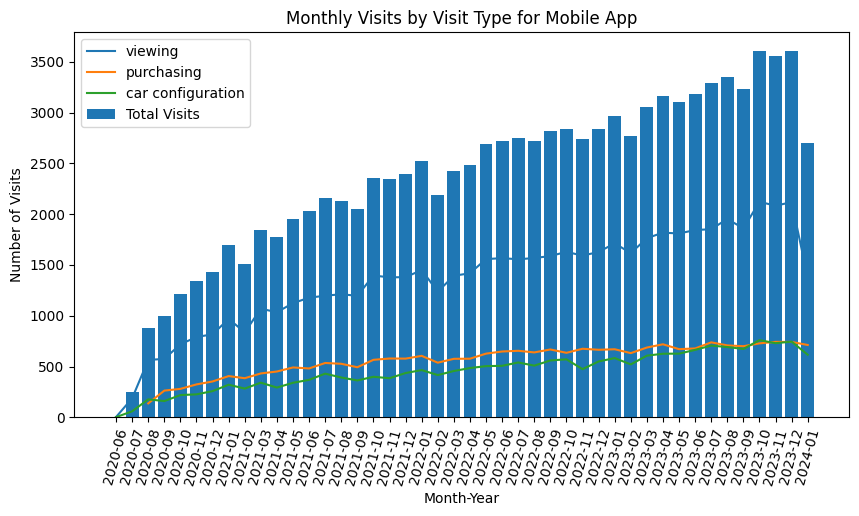

In [53]:
platforms = visits['platform'].unique()

for platform in platforms:
    # check if it's not nan
    if pd.notnull(platform):
        fig, ax = plt.subplots(figsize=(10, 5))

        # filter visits by platform
        platform_visits = visits[visits['platform'] == platform]

        # plot the histogram of total visits
        monthly_visits = platform_visits['start_timestamp'].dt.to_period('M').value_counts().sort_index()
        ax.bar(monthly_visits.index.astype(str), monthly_visits.values, label='Total Visits')

        # plot a line for every visit_type
        for visit_type in platform_visits['visit_type'].unique():
            monthly_visits = platform_visits[platform_visits['visit_type'] == visit_type]['start_timestamp'].dt.to_period('M').value_counts().sort_index()
            ax.plot(monthly_visits.index.astype(str), monthly_visits.values, label=visit_type)

        # set the labels and title
        ax.set_xlabel('Month-Year')
        ax.set_ylabel('Number of Visits')
        ax.set_title(f'Monthly Visits by Visit Type for {platform}')

        # rotate x-axis labels for better readability
        plt.xticks(rotation=75)

        # show the grid

        # add a legend
        ax.legend()

        # show the plot
    plt.show()

The dealership's monthly visits did not lose any growth with the introduction of the Website and the Mobile App. <br>This indicates that the dealership platform maintained its user base and continued to attract visits despite the availability of other platforms. <br>The consistent growth across all platforms suggests a robust and expanding customer engagement strategy.

### Price distribution by platform

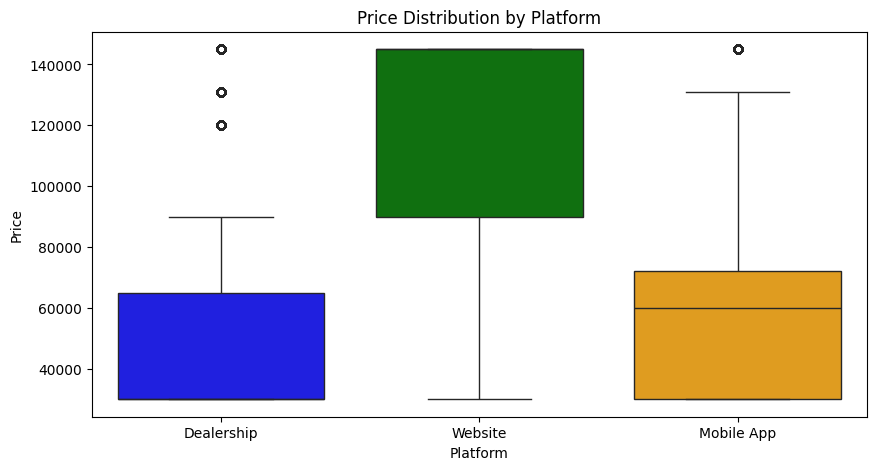

In [81]:
# create a figure and axis
fig, ax = plt.subplots(figsize=(10, 5))

# plot the boxplot
sns.boxplot(data=visits, x='platform', y='price', ax=ax, palette=platform_colors, hue='platform', legend=False)

# set the labels and title
ax.set_xlabel('Platform')
ax.set_ylabel('Price')
ax.set_title('Price Distribution by Platform')

# show the plot
plt.show()

### Customer analisys

In [54]:
# Plot a Sankey diagram of visit type transitions

visits_sankey = visits.copy()

visits_sankey = visits_sankey.sort_values(by=['customer_id', 'start_timestamp'])
visits_sankey['next_visit_type'] = visits_sankey.groupby('customer_id')['visit_type'].shift(-1)

visit_type_indices = {
    'viewing': 0,
    'testing': 1,
    'car configuration': 2,
    'purchasing': 3
}

platforms = visits['platform'].unique()

for platform in platforms:
    if pd.notnull(platform):
        visits_sankey = visits[visits['platform'] == platform].copy()
        visits_sankey = visits_sankey.sort_values(by=['customer_id', 'start_timestamp'])
        visits_sankey['next_visit_type'] = visits_sankey.groupby('customer_id')['visit_type'].shift(-1)

        transition_counts = visits_sankey.groupby(['visit_type', 'next_visit_type']).size().reset_index(name='count')
        transition_counts['source'] = transition_counts['visit_type'].map(visit_type_indices)
        transition_counts['target'] = transition_counts['next_visit_type'].map(visit_type_indices)

        fig = go.Figure(data=[go.Sankey(
            node=dict(
                pad=15,
                thickness=20,
                line=dict(color="black", width=0.5),
                label=["viewing", "testing", "car configuration", "purchasing"],
                color=["blue", "green", "purple", "orange"]
            ),
            link=dict(
                source=transition_counts['source'],
                target=transition_counts['target'],
                value=transition_counts['count']
            )
        )])

        fig.update_layout(title_text=f"Sankey Diagram of Visit Type Transitions for {platform}", font_size=10)
        fig.show()

del visits_sankey

#### Engagement Rate (%) 

##### Engagement Rate (visit type)

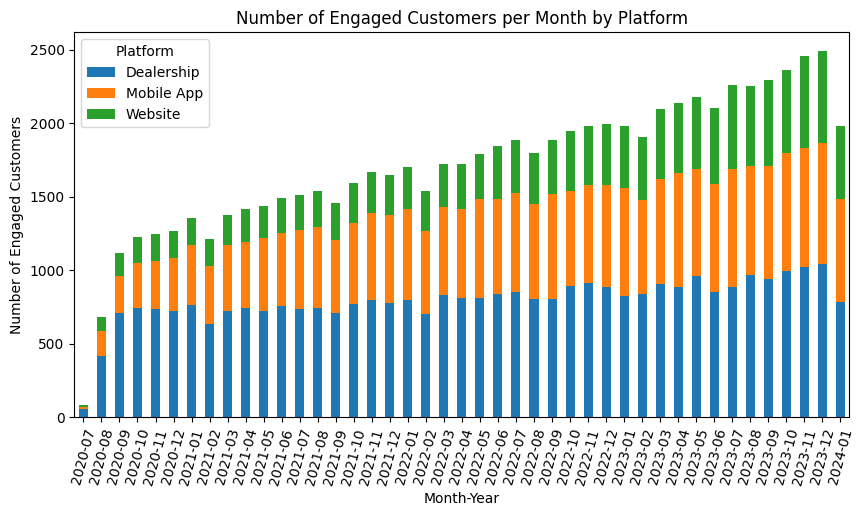

In [55]:
# group by month_year and platform, and count the number of engaged customers
monthly_engaged = visits[visits['engaged']].groupby(['month_year', 'platform'])['customer_id'].nunique().unstack()

fig, ax = plt.subplots(figsize=(10, 5))
monthly_engaged.plot(kind='bar', stacked=True, ax=ax)
ax.set_xlabel('Month-Year')
ax.set_ylabel('Number of Engaged Customers')
ax.set_title('Number of Engaged Customers per Month by Platform')
plt.xticks(rotation=75)
ax.legend(title='Platform')
plt.show()

del monthly_engaged

In [72]:
import numpy as np

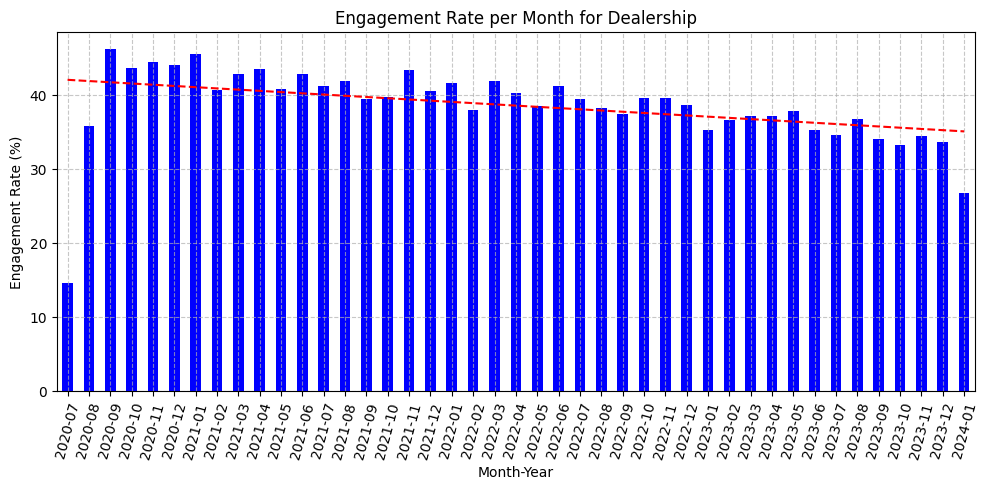

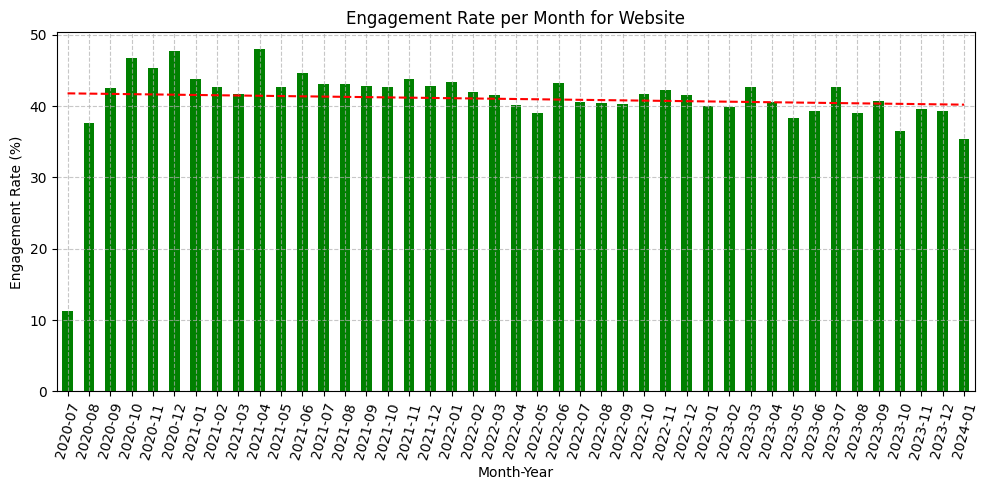

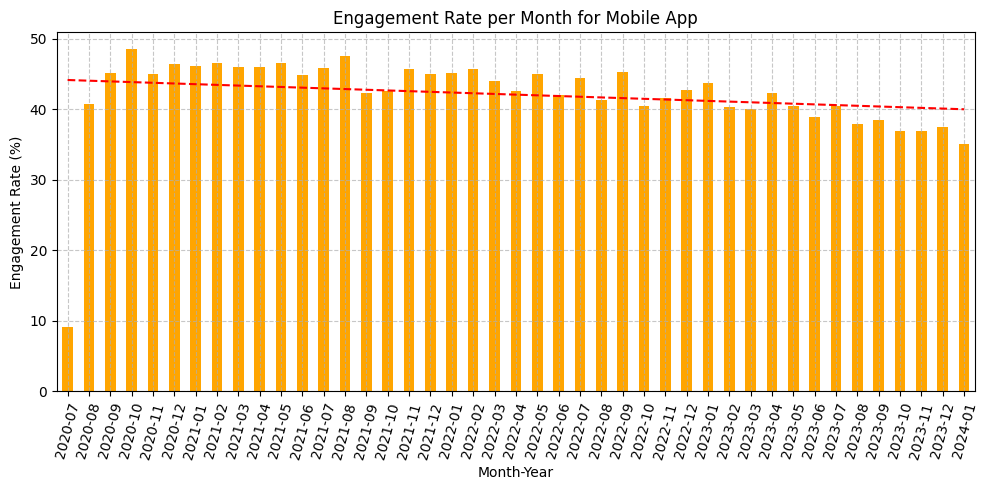

In [ ]:
# plot the engagement for each platform
for platform in visits["platform"].unique():
    if pd.notnull(platform):
        fig, ax = plt.subplots(figsize=(10, 5))

        platform_visits = visits[visits["platform"] == platform]

        monthly_engaged = platform_visits[platform_visits["engaged"]].groupby(platform_visits["month_year"])["customer_id"].nunique()
        monthly_total = platform_visits.groupby(platform_visits["month_year"])["customer_id"].nunique()

        monthly_engagement = (monthly_engaged / monthly_total) * 100

        # Drop NaN values for trend line calculation
        monthly_engagement = monthly_engagement.dropna()

        monthly_engagement.plot(kind="bar", ax=ax, color=platform_colors.get(platform, 'gray'))

        # Add trendline if there are enough data points
        if len(monthly_engagement) > 1:
            z = np.polyfit(range(len(monthly_engagement)), monthly_engagement, 1)
            p = np.poly1d(z)
            ax.plot(monthly_engagement.index.astype(str), p(range(len(monthly_engagement))), "r--")

        ax.set_xlabel("Month-Year")
        ax.set_ylabel("Engagement Rate (%)")
        ax.set_title(f"Engagement Rate per Month for {platform}")
        plt.xticks(rotation=75)
        plt.grid(True, linestyle='--', alpha=0.7)
        plt.tight_layout()

        plt.show()

The Dealership is clearly struggling to generate new engagement. In contrast, the Mobile App and Website are experiencing consistent growth, which is a positive trend.

##### Engagement Rate (user review)

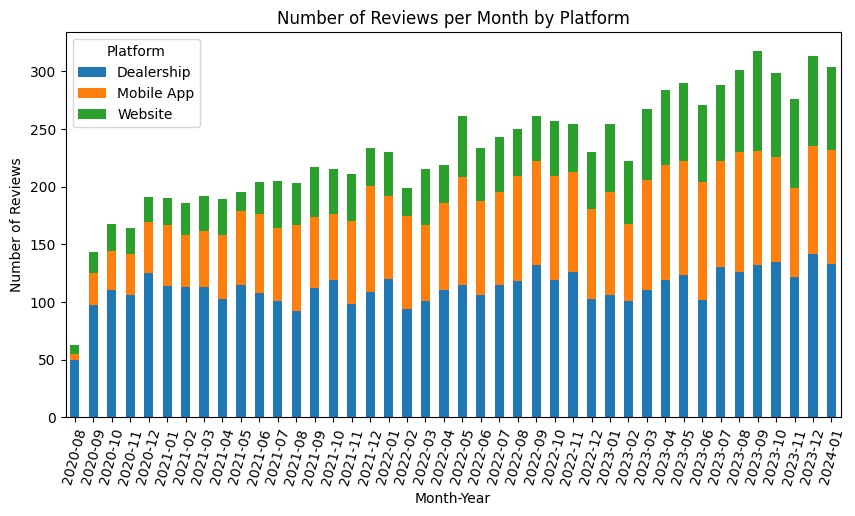

In [56]:
# filter the visits
reviewed_visits = visits[visits['reviewed']]

# group by month_year and platform, and count the number of unique customers who left a review
monthly_reviews = reviewed_visits.groupby(['month_year', 'platform'])['customer_id'].nunique().unstack()

fig, ax = plt.subplots(figsize=(10, 5))
monthly_reviews.plot(kind='bar', stacked=True, ax=ax)
ax.set_xlabel('Month-Year')
ax.set_ylabel('Number of Reviews')
ax.set_title('Number of Reviews per Month by Platform')
plt.xticks(rotation=75)
ax.legend(title='Platform')
plt.show()

del reviewed_visits

The same pattern is observed here.

#### Conversion Rate (%)

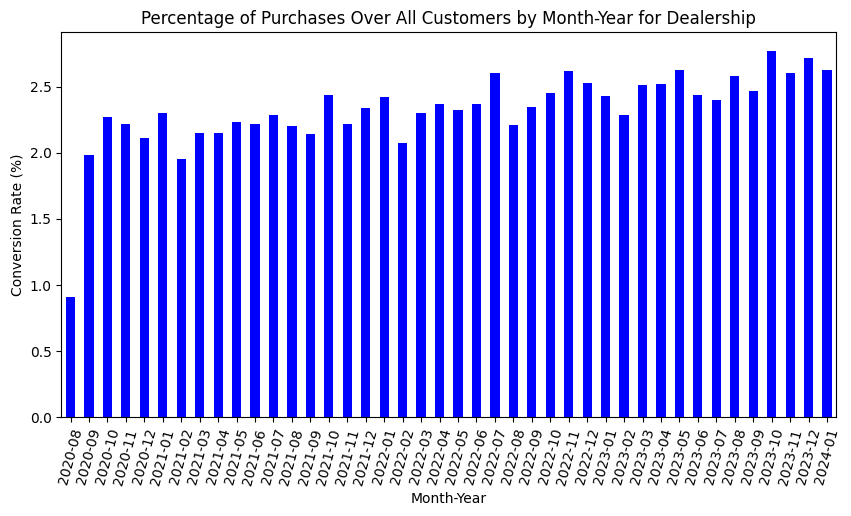

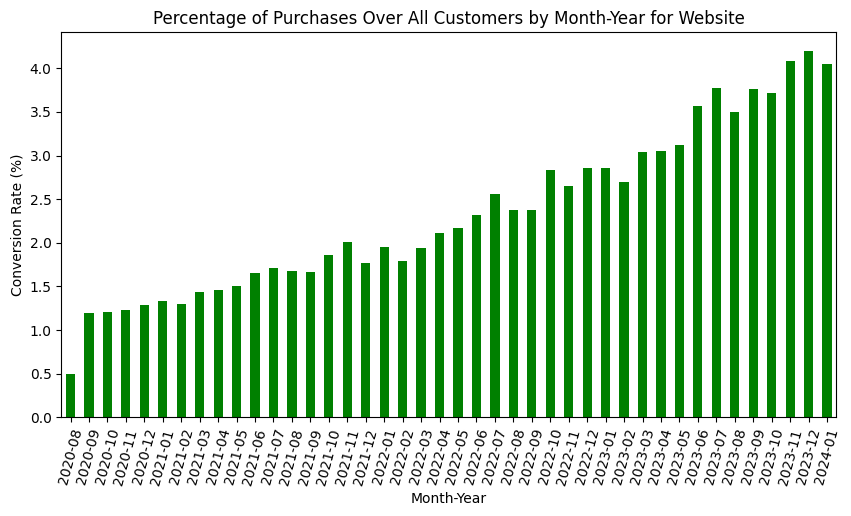

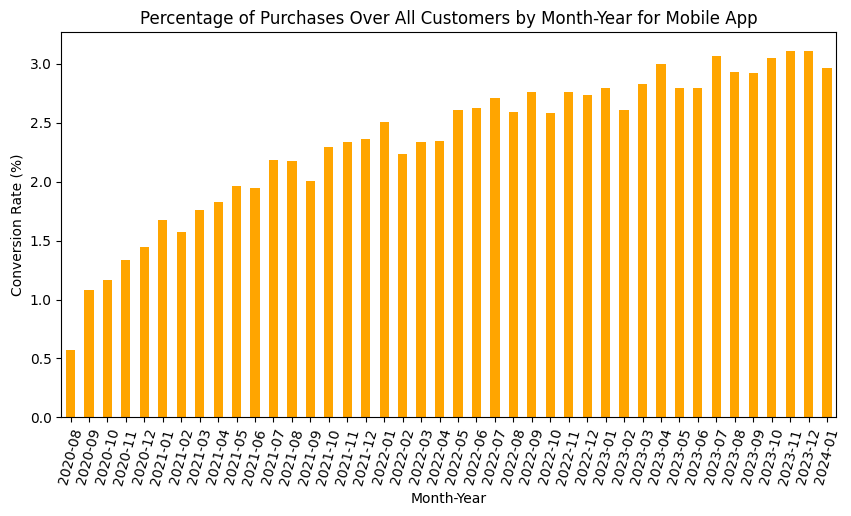

In [57]:
for platform in visits['platform'].unique():
    if pd.notnull(platform):
        fig, ax = plt.subplots(figsize=(10, 5))

        # filter visits by platform and visit number > 1
        platform_visits = visits[(visits['platform'] == platform) & (visits['visit_number'] > 1)]

        purchase_percentage = platform_visits[platform_visits['purchased']].groupby('month_year')['customer_id'].nunique() / platform_visits['customer_id'].nunique() * 100
        purchase_percentage.plot(kind='bar', ax=ax, color=platform_colors.get(platform, 'gray'))
        ax.set_xlabel('Month-Year')
        ax.set_ylabel('Conversion Rate (%)')
        ax.set_title(f'Percentage of Purchases Over All Customers by Month-Year for {platform}')
        plt.xticks(rotation=75)
        plt.show()

del platform_visits

The website is the top performer and shows the most significant growth. The mobile app's growth appears to have slowed down, while the dealership remains stable over time (no bueno).

This indicates that the website is performing exceptionally well, and the current strategy is effective. However, the mobile app and dealership platforms require attention to enhance their performance.

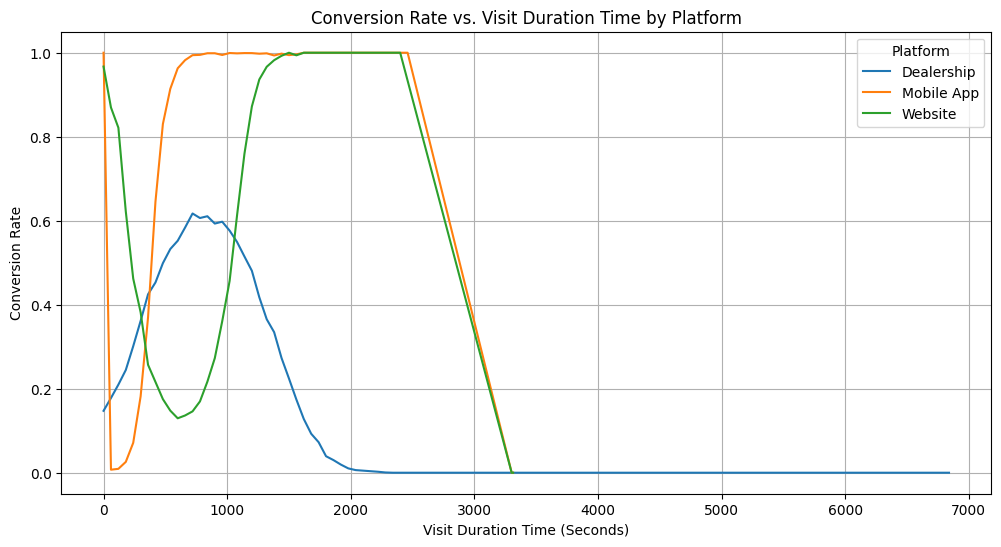

In [58]:
# group by platform and visit duration time, then calculate the mean conversion rate
purchased_by_duration = visits.groupby(['platform', 'visit_duration_time'])['purchased'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=purchased_by_duration, x='visit_duration_time', y='purchased', hue='platform')
plt.xlabel('Visit Duration Time (Seconds)')
plt.ylabel('Conversion Rate')
plt.title('Conversion Rate vs. Visit Duration Time by Platform')
plt.legend(title='Platform')
plt.grid(True)
plt.show()

The website and the Mobile App lines are strange, let's investigate them

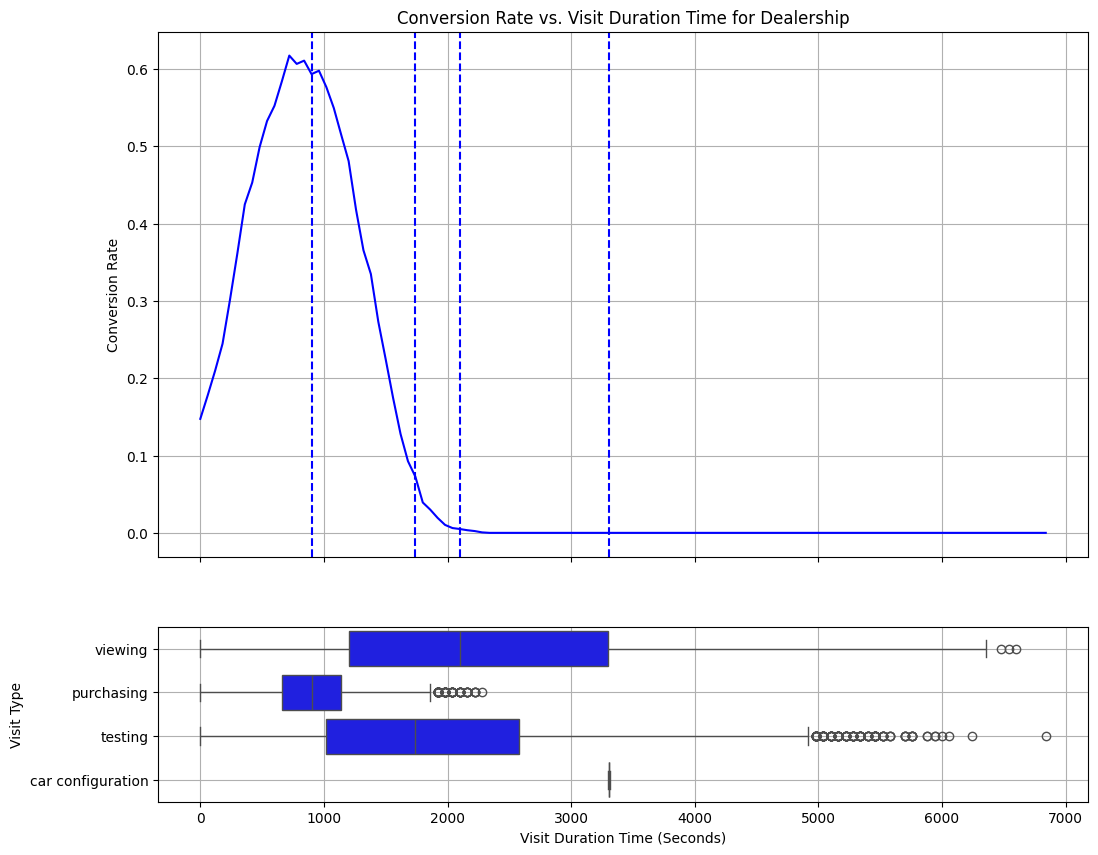

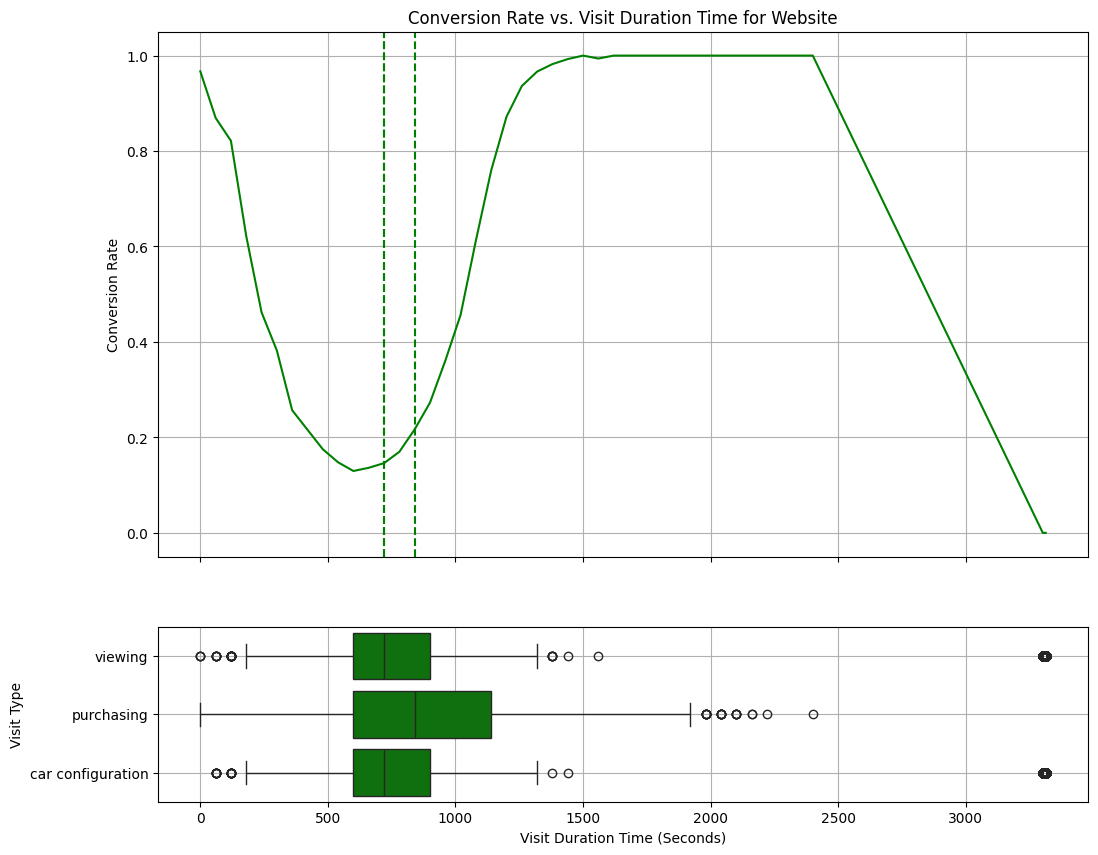

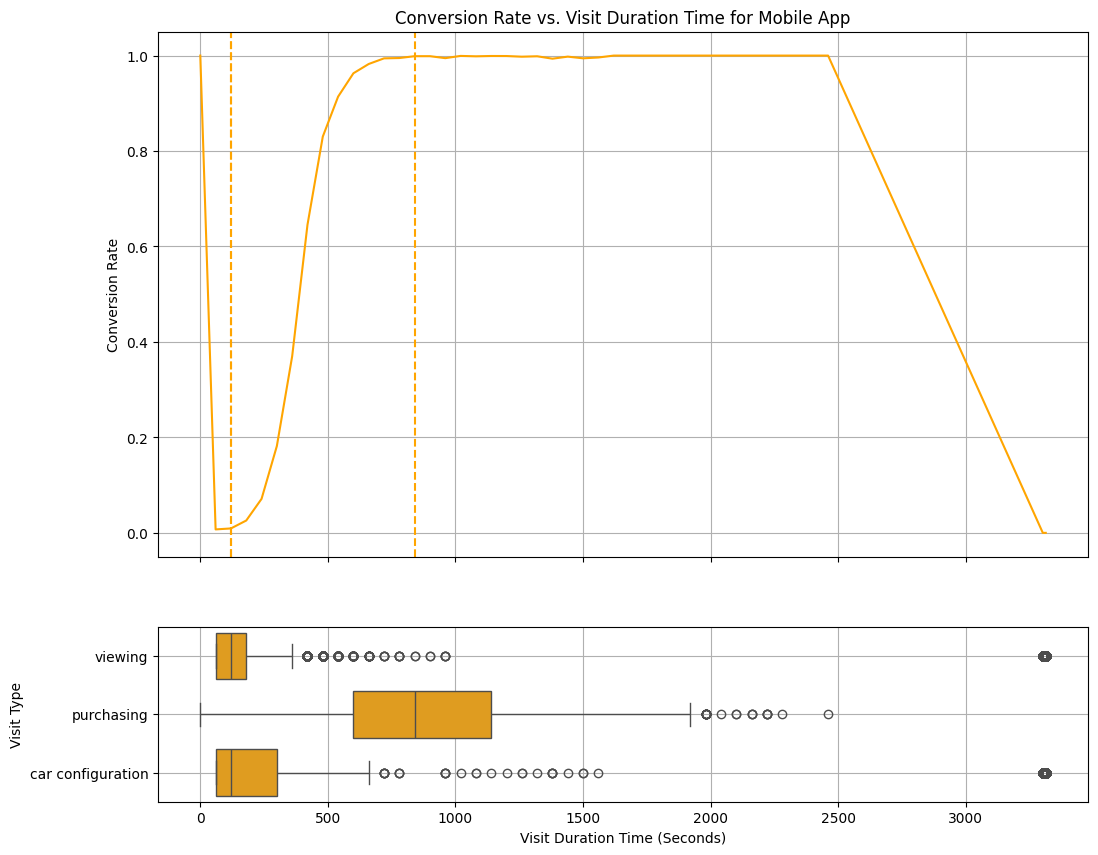

In [59]:
# Get unique platforms
platforms = visits['platform'].unique()

median_visit_duration = visits.groupby(['platform', 'visit_type'])['visit_duration_time'].median().reset_index()

# Loop through each platform and create a plot
for platform in platforms:
    if pd.notnull(platform):
        # Filter data for the current platform
        platform_data = purchased_by_duration[purchased_by_duration['platform'] == platform]

        # Create a subplot with 2 rows and 1 column
        fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10), sharex=True, gridspec_kw={'height_ratios': [3, 1]})

        # Plot the lineplot on the first axis
        sns.lineplot(data=platform_data, x='visit_duration_time', y='purchased', color=platform_colors.get(platform, 'gray'), ax=ax1)
        ax1.set_ylabel('Conversion Rate')
        ax1.set_title(f'Conversion Rate vs. Visit Duration Time for {platform}')
        ax1.grid(True)

        # Add a vertical line for the median visit duration time
        median_duration = median_visit_duration[median_visit_duration['platform'] == platform]
        for _, row in median_duration.iterrows():
            ax1.axvline(x=row['visit_duration_time'], color=platform_colors.get(platform, 'gray'), linestyle='--', label=f"Median {row['visit_type']}")

        # Plot the boxplot on the second axis
        sns.boxplot(data=visits[visits['platform'] == platform], x='visit_duration_time', y='visit_type', ax=ax2, color=platform_colors.get(platform, 'gray'))
        ax2.set_xlabel('Visit Duration Time (Seconds)')
        ax2.set_ylabel('Visit Type')
        ax2.grid(True)

        # Show the plot
        plt.show()

#### User loyalty

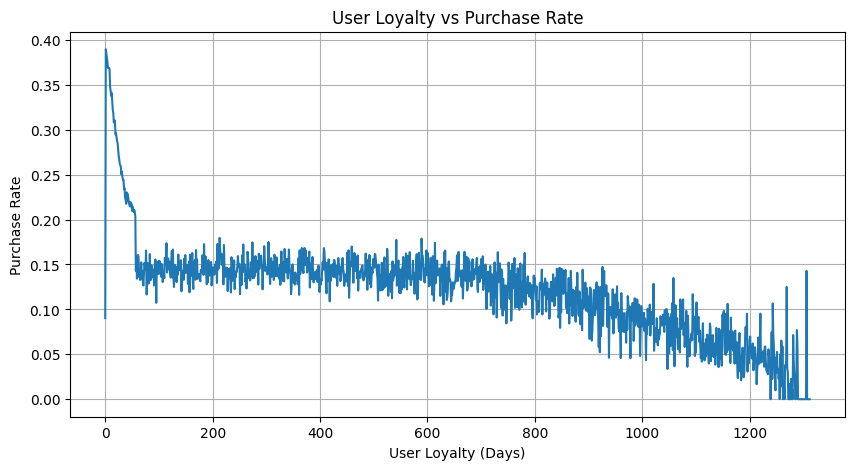

In [60]:
# Group by loyalty and calculate the purchase rate
loyalty_purchase_rate = visits.groupby('loyalty')['purchased'].mean().reset_index()

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 5))

# Plot the loyalty vs purchase rate
sns.lineplot(data=loyalty_purchase_rate, x='loyalty', y='purchased', ax=ax)

# Set the labels and title
ax.set_xlabel('User Loyalty (Days)')
ax.set_ylabel('Purchase Rate')
ax.set_title('User Loyalty vs Purchase Rate')

# Show the plot
plt.grid(True)
plt.show()

This graph shows how the loyalty doesen't correlate in a positive manner to the purchase rate, that's mostly because the number of customer every year grown and there are no customer that bought more than one car

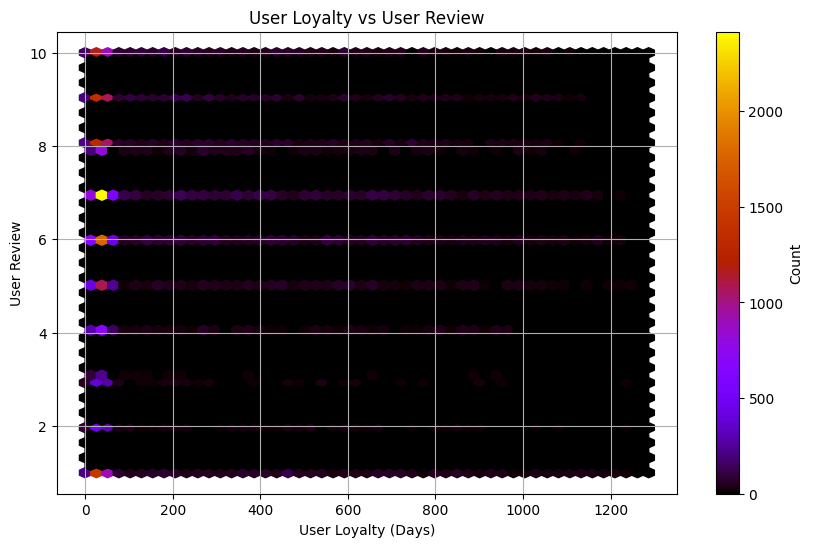

In [61]:
# Filter out rows where user_review is NaN
loyalty_review_data = visits[visits['user_review'].notna()]

# Create a hexbin plot
plt.figure(figsize=(10, 6))
plt.hexbin(loyalty_review_data['loyalty'], loyalty_review_data['user_review'], gridsize=50, cmap='gnuplot')

# Set the labels and title
plt.xlabel('User Loyalty (Days)')
plt.ylabel('User Review')
plt.title('User Loyalty vs User Review')

# Add a color bar
plt.colorbar(label='Count')

# Show the plot
plt.grid(True)
plt.show()

The loyalty dosen't seem to correlate with the user experience

#### Other info

In [62]:
# check if there's any unique value for the customer_id that doesn't repeat
print(f"There are {len(visits['customer_id'].value_counts()[visits['customer_id'].value_counts() == 1])} unique customers that visited only once.")
print(f"This represents {len(visits['customer_id'].value_counts()[visits['customer_id'].value_counts() == 1]) / len(visits['customer_id'].value_counts()) * 100:.2f}% of the total customers.")

There are 35482 unique customers that visited only once.
This represents 26.06% of the total customers.


In [63]:
# check how many users have a purchase
print(f"There are {len(visits[visits['purchased']]['customer_id'].unique())} users that have made a purchase.")
print(f"This represents {len(visits[visits['purchased']]['customer_id'].unique()) / len(visits['customer_id'].unique()) * 100:.2f}% of the total users.")

There are 74774 users that have made a purchase.
This represents 54.91% of the total users.


In [64]:
# group by customer_id and visit_date, and count the number of visits
visits_per_day = visits.groupby(['customer_id', visits['start_timestamp'].dt.date]).size()

# filter to get only the users who visited more than once on the same day
multiple_visits_per_day = visits_per_day[visits_per_day > 1]
print(f"There are {multiple_visits_per_day.shape[0]} instances of users visiting more than once on the same day.")

There are 5642 instances of users visiting more than once on the same day.


#### Avarage user review

C:\Users\gabri\AppData\Local\Temp\ipykernel_11796\108094133.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



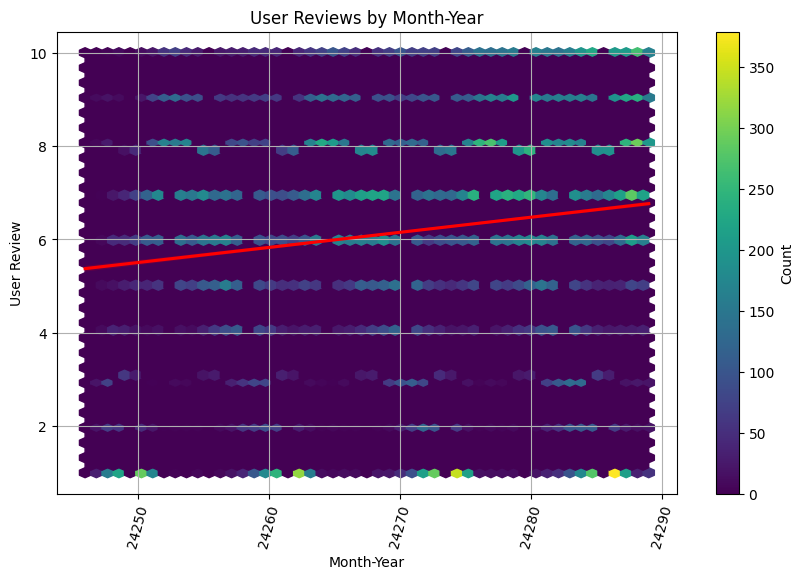

In [65]:
review_data = visits[visits['user_review'].notna()]
review_data['month_year_num'] = review_data['month_year'].apply(lambda x: x.year * 12 + x.month)

plt.figure(figsize=(10, 6))
plt.hexbin(review_data['month_year_num'], review_data['user_review'], gridsize=50, cmap='viridis')
# trend line
sns.regplot(data=review_data, x='month_year_num', y='user_review', scatter=False, color='red')

plt.xlabel('Month-Year')
plt.ylabel('User Review')
plt.title('User Reviews by Month-Year')
plt.colorbar(label='Count')
plt.xticks(rotation=75)
plt.grid(True)
plt.show()

del review_data

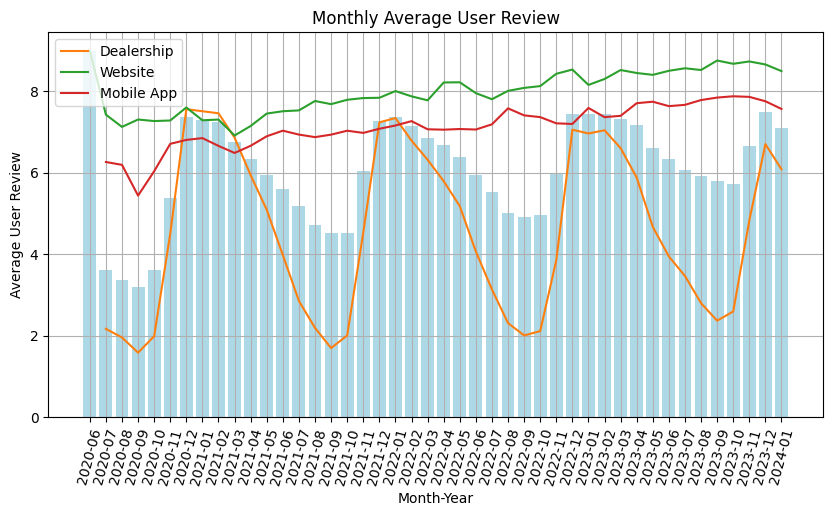

In [66]:
# plot the user_review group by month and year
fig, ax = plt.subplots(figsize=(10, 5))

# plot the histogram
monthly_review = visits.groupby(visits['start_timestamp'].dt.to_period('M'))['user_review'].mean()
ax.bar(monthly_review.index.astype(str), monthly_review.values, color='lightblue', alpha=1)

# plot a line for every platform
for platform in visits['platform'].unique():
    monthly_review = visits[visits['platform'] == platform].groupby(visits['start_timestamp'].dt.to_period('M'))['user_review'].mean()
    ax.plot(monthly_review.index.astype(str), monthly_review.values, label=platform)

# set the labels and title
ax.set_xlabel('Month-Year')
ax.set_ylabel('Average User Review')
ax.set_title('Monthly Average User Review')

# rotate x-axis labels for better readability
plt.xticks(rotation=75)

# show a grid
plt.grid(True)

# add a legend
ax.legend()

# show the plot
plt.show()

The avarage pattern here is really strange, but the trend is still positive

We can see that there's something strange arrount the Q3 (probably the website was in beta or something similar)

To investigate more the Dealership problem we can try with the correlation.

#### Monthly Purchases

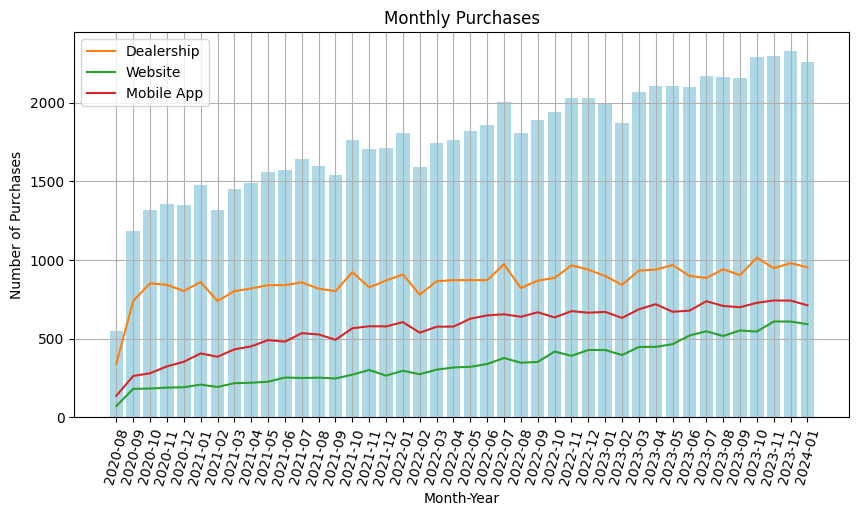

In [67]:
# plot the number of purchases by month and year
fig, ax = plt.subplots(figsize=(10, 5))

# plot the histogram
monthly_purchases = visits[visits['purchased']].groupby(visits['start_timestamp'].dt.to_period('M')).size()
ax.bar(monthly_purchases.index.astype(str), monthly_purchases.values, color='lightblue', alpha=1)

# plot a line for every platform
for platform in visits['platform'].unique():
    monthly_purchases = visits[(visits['platform'] == platform) & visits['purchased']].groupby(visits['start_timestamp'].dt.to_period('M')).size()
    ax.plot(monthly_purchases.index.astype(str), monthly_purchases.values, label=platform)

# set the labels and title
ax.set_xlabel('Month-Year')
ax.set_ylabel('Number of Purchases')
ax.set_title('Monthly Purchases')

# rotate x-axis labels for better readability
plt.xticks(rotation=75)

# show a grid
plt.grid(True)

# add a legend
ax.legend()

# show the plot
plt.show()

'visit_id', 'customer_id', 'start_timestamp', 'end_timestamp',
       'visit_type', 'transaction_id', 'visit_duration_time',
       'user_first_name', 'user_last_name', 'gender', 'email', 'email_domain',
       'purchase', 'platform', 'purchase_date', 'purchase_price',
       'user_review', 'car_model', 'fuel_type', 'release_date', 'price',
       'discount', 'car_age_days', 'average_visit_time', 'visit_number',
       'visit_date'

In [68]:
# save the data
visits.to_csv('Modified_Data/visits.csv', index=False)